### 회귀 날코딩~

((100, 1), (100, 1))

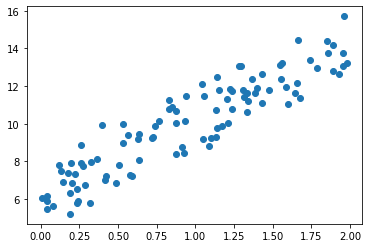

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4X + 6 식을 근사 (w1=4, w0=6), random 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6+ 4*X + np.random.randn(100,1)

# X,y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

X.shape, y.shape

In [12]:
def get_weight_updates(w1,w0, X, y, learning_rate = 0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    #w0_update를 dot 행렬 연산으로 구하기 위해 모드 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*np.dot(w0_factors.T,diff)

    return w1_update, w0_update

#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0 업데이트 적용
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1,w0

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N #오차값
    return cost

w1,w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1:{w1[0,0]:.3f} w0:{w0[0,0]:.3f}')
y_pred = w1[0,0]*X + w0
print(f'Gradient Descent Total Cost:{get_cost(y,y_pred):.4f}')

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


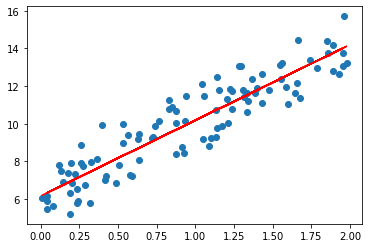

In [8]:
plt.scatter(X,y)
plt.plot(X,y_pred,"r")

In [14]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index=0

    for ind in range(iters):
        np.random.seed(ind)
        #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 샘플_X,샘플_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1,w0

In [15]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [16]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print(f'w1 : {round(w1[0,0],3)}, w0 : {round(w0[0,0],3)}')
y_pred = w1[0,0] * X + w0
print(f'Stochastic Gradient Descent Total Cost : {get_cost(y,y_pred):.4f}')

w1 : 4.028, w0 : 6.156
Stochastic Gradient Descent Total Cost : 0.9937


### Linear Regression

[79.6131561]


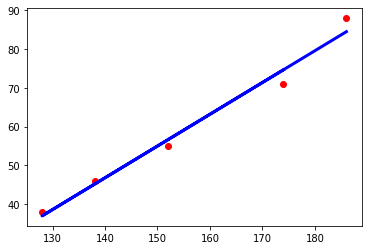

In [19]:
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()

X = [[174],[152],[138],[128],[186]]
y=[71,55,46,38,88]
reg.fit(X,y)

print(reg.predict([[180]]))

plt.scatter(X,y,color="r")

y_pred = reg.predict(X)

plt.plot(X,y_pred,color='blue', linewidth=3)
plt.show()

### 당뇨병 회귀

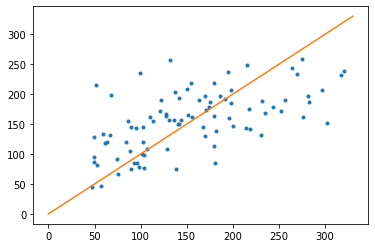

In [42]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes = datasets.load_diabetes()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.plot(y_test, y_pred,'.')

#직선 그리기 위하여 완벽한 선형 데이터를 생성
x = np.linspace(0,330, 100)
y = x
plt.plot(x,y)
plt.show()

### 선형 회귀 이용한 보스턴 주택가격 예측

In [74]:
# LinearRegression 이용한 보스턴 주택가격 예측

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


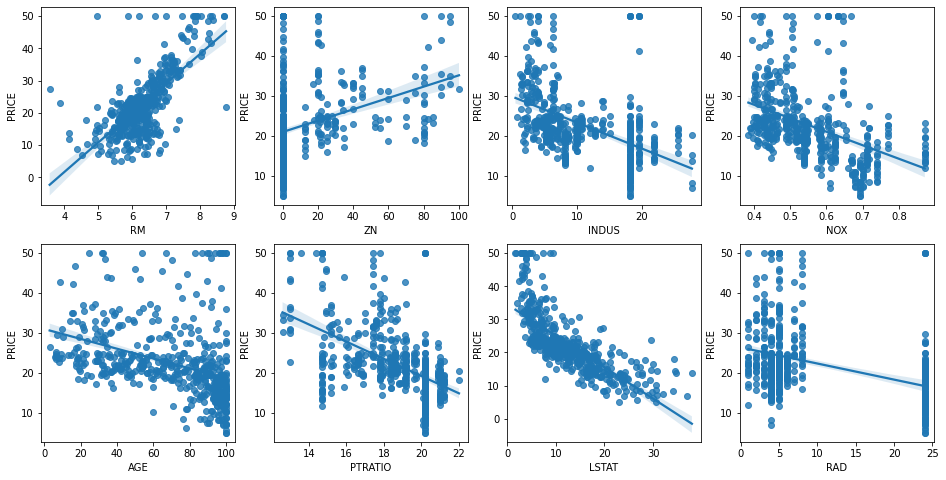

In [75]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [83]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test,y_preds):.3f}')
print(f'절편값 : {lr.intercept_}')
print(f'회귀 계수값: {np.round(lr.coef_,1)}')


MSE : 17.297, RMSE : 4.159
Variance score : 0.757
절편값 : 40.99559517216429
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [99]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
# X_data.columns
coeff.sort_values(ascending=False)

# NOX 회귀 계수 값이 매우 큼 -> NOX 값에 따라 얘측 오류 값이 많은 영향 받을 것으로 예상

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [105]:
# Fold 셋으로 교차 검증을 수행하여 MSE, RMSE 구하기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score() 5 fold set으로 mse 구한 뒤 이를 기반으로 다시 rmse 구함
neg_mse_scores = cross_val_score(lr,X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rmse_scores,2)}')
print(f'5 folds의 평균 RMSE : {avg_rmse:.3f}')
# print(f'5 folds의 개별 RMSE scores: {rmse_scores:.2f)}')

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


### hounsig 데이터 이용 회귀분석 연습 과제
Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. LinearRegression     을활용하여 MSE  구하세요
Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. Feature Scaling  을한후
4. LinearRegression     을활용하여 MSE
Train : test = 70 : 30
1. 0: 13 => feature
2. 13 => label
3. random_forest    또는XGBoost      를활용하여적정한
feature_select 한후
1. LinearRegression을 활용하여 MSE

### 다항회귀

polynomial 사이킷ㄹ천 찾아서 정리래

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print(f'일차 단항식 계수 feature:\n {X}')

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [22]:
# degree =2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures 를 이용하여 변환

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(f'변환된 2차 다항식 계수 features : \n {poly_ftr}')

변환된 2차 다항식 계수 features : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [29]:
def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y
X  = np.arange(4).reshape(2,2)
print(f'일차 단항식 계수 features : \n {X}')
y = polynomial_func(X)
print(f'3차 다항식 결정값 : \n {y}')





일차 단항식 계수 features : 
 [[0 1]
 [2 3]]
3차 다항식 결정값 : 
 [[ 1  5]
 [17 43]]


In [33]:
from sklearn.linear_model import LinearRegression
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(f'3차 다항식 계수 features : \n {poly_ftr}')

#linear regression 에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print(f'Polynomial 회귀계수\n {np.round(model.coef_,2)}')
print(f'Polynomial 회귀 shape : {model.coef_.shape}')


3차 다항식 계수 features : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 shape : (2, 10)


### 파이프라인 이용 다항 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+ 2*X + X**2 + X**3
    return y

#Pipeline 객체로 Streamline 하게 Polynomial Featurequs변환과 Linear Regression을 연결
model = Pipeline(['poly',PolynomialFeatures(degree=3)])

### 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()